 Aim :
 
 A company started to invest in digital marketing as a new way of their product promotions.
 For that they collected data and decided to carry out a study on it.

## Import packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
data=pd.read_csv('Sales_add.csv')
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


No null values

## Visualisation

In [4]:
Sales1_wrt_Region=data.groupby('Region')['Sales_before_digital_add(in $)'].sum()
Sales1_wrt_Region

Region
Region - A    1482049
Region - B    1053665
Region - C     747565
Name: Sales_before_digital_add(in $), dtype: int64

In [5]:
Sales2_wrt_Region=data.groupby('Region')['Sales_After_digital_add(in $)'].sum()
Sales2_wrt_Region

Region
Region - A    2388531
Region - B    1601095
Region - C    1095096
Name: Sales_After_digital_add(in $), dtype: int64

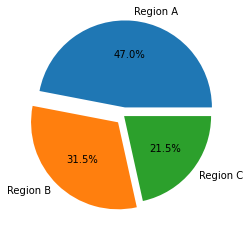

In [6]:
plt.pie(Sales2_wrt_Region,labels=['Region A','Region B','Region C'],autopct='%1.1f%%',explode=[0.1,0.1,0.0])
plt.show()

## Insights :

 * The sales in Region A is higher than in Region B and Region C.

 ## 1.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

 Here,    
 
            The null hypothesis          H0 : Sales_before_digital_add(in dollar) = Sales_After_digital_add(in dollar).
 
            The alternate hypothesis     H1 : Sales_before_digital_add(in dollar) < Sales_After_digital_add(in dollar).
 
 The alternate hypothesis indicates that this is a one-tailed test.
 
 Since the sample size is <=30, 2-sample dependant t-test is used to test the hypothesis.

In [7]:
sample_size=len(data)
sample_size

22

In [8]:
stats.ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],alternative='less')

Ttest_relResult(statistic=-12.09070525287017, pvalue=3.168333502287889e-11)

In [9]:
pvalue=3.168333502287889e-11
pvalue<0.05

True

## Conclusion :

Since p value=3.168333502287889e-11 is less than the significance level alpha=0.05, we reject the null hypothesis H0.
So, we see that there is increase in sales after advertisements.

## 2. whether there is any dependency between the features “Region” and “Manager”.

 Here, we are testing the dependancy of two categorical variables 'Region' and 'Manager'. So, we use Chi-Square test for independance.
            
            The null hypothesis          H0 : Region and Manager are independant
            The alternate hypothesis     H1 : Region and Manager are dependant                                   

In [10]:
contingency_table=pd.crosstab(data['Region'],data['Manager'])
contingency_table

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [11]:
obs=contingency_table.values
obs

array([[4, 3, 3],
       [4, 1, 2],
       [1, 3, 1]], dtype=int64)

In [12]:
b=stats.chi2_contingency(contingency_table)
exp=b[3]
exp

array([[4.09090909, 3.18181818, 2.72727273],
       [2.86363636, 2.22727273, 1.90909091],
       [2.04545455, 1.59090909, 1.36363636]])

In [13]:
rows=len(contingency_table.iloc[0:2,0])
col=len(contingency_table.iloc[0,0:2])
ddof=(rows-1)*(col-1)
alpha=0.05

In [14]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(obs,exp)])
chi_square_statistic=chi_square[0]+chi_square[1]
critical=chi2.ppf(q=1-alpha,df=ddof)
critical

3.841458820694124

In [15]:
pvalue=chi2.cdf(x=chi_square_statistic,df=ddof)
pvalue

0.9126202550470086

In [16]:
if pvalue<=alpha:
    print('Reject H0')
else:
    print('Accept H0')

Accept H0


## Conclusion :

The p value=0.9126202550470086 is greater than the significance level alpha=0.05, so we accept the hypothesis H0.
We conclude that Region and Manager are not dependant with each other.